### Shape classification using machine learning
In this hands-on, we will go through the machine learning workflow of data preparation, training, testing, tuning and deployment of a  model for the classification of circles, squares and triangles.

In [1]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from random import randrange

filelist = []
labels = []
for root, dirs, files in os.walk('data/three_shapes_filled/'):
    print(f'Folder: {root}, sub-folders: {dirs}, number of files: {len(files)}')
    if len(files) == 0:
        continue
    filelist.extend([os.path.join(root, f) for f in files])
    dir = root.split('/')[-1]
    labels.extend([dir] * len(files))


Folder: data/three_shapes_filled/, sub-folders: ['circle', 'square', 'triangle'], number of files: 0
Folder: data/three_shapes_filled/circle, sub-folders: [], number of files: 200
Folder: data/three_shapes_filled/square, sub-folders: [], number of files: 200
Folder: data/three_shapes_filled/triangle, sub-folders: [], number of files: 200


In [3]:
# Read image and reshape as 1D array
images = imread(filelist[0], as_gray=True).reshape(1, -1)
for i in range(1, len(filelist)):
    images = np.append(images, imread(filelist[i], as_gray=True).reshape(1, -1), axis=0)

In [4]:
X = images
y = np.array(labels)
print(X.shape, y.shape)

(600, 1024) (600,)


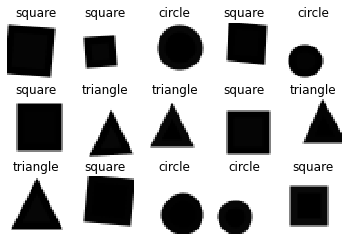

In [5]:
indices = [randrange(len(X)) for i in range(15)]
fig, axes = plt.subplots(3, 5)
for ax, image, label in zip(axes.ravel(), X[indices], y[indices]):
    ax.set_axis_off()
    ax.set_title(label)
    ax.imshow(image.reshape(32, 32), cmap='gray', interpolation='nearest')

- To do: 
  - Split the dataset into training and testing sets.
  - Train a knn model (using default settings).
  - Evaluate its performance using the testing set and print the score.

In [6]:
from sklearn.model_selection import train_test_split as split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = split(X, y, stratify=y, random_state=42)

knn = KNeighborsClassifier().fit(X_train, y_train)
print(f'{knn.score(X_test, y_test)}')

0.8666666666666667


- To do: 
  - Construct a pipeline with three steps: scaling ('scl'), dimensionality reduction using PCA ('dr') and classification ('clf').
  - Use gridsearch to search for the best process for each steps as follows:
    - scaling: No scaling, MinMaxScaler, StandardScaler.
    - dimensionality reduction with PCA: test with 50 to 150 principal components (with an interval of 10).
    - classification: test with kNN, logistic regression, decision tree, random forests, gradient boosted tree, extreme gradient boost, support vector machine and multilayer perceptron on this dataset with no rescaling, MinMaxScaler, StandardScaler and RobustScaler. 
    - Use default settings for all the classifiers.

In [7]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('scl', None), ('dr', PCA(random_state=42)), ('clf', KNeighborsClassifier())])
params = {}
params['scl'] = [None, StandardScaler(), MinMaxScaler()]
params['dr__n_components'] = range(50, 150, 10)
params['clf'] = [KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
                GradientBoostingClassifier(), SVC(), MLPClassifier()]
gs = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(gs.best_params_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
{'clf': MLPClassifier(), 'dr__n_components': 60, 'scl': StandardScaler()}


-  To do: 
  - Store the best model as 'model'.
  - Evaluate the best model using the testing set and print the score.

In [8]:
model = gs.best_estimator_
print(f'Best model score: {model.score(X_test, y_test)}')

Best model score: 0.9266666666666666


- Random select 15 test data and predict their corresponding classes.
- Plot the test data and the predicted labels.

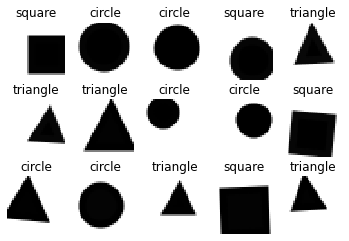

In [9]:
ind_test = [randrange(len(X_test)) for i in range(15)]
y_pred = model.predict(X_test[ind_test])

fig, axes = plt.subplots(3, 5)
for ax, image, label in zip(axes.ravel(), X_test[ind_test], y_pred):
    ax.set_axis_off()
    ax.set_title(label)
    ax.imshow(image.reshape(32, 32), cmap='gray', interpolation='nearest')

-  Plot the confusion matrix.

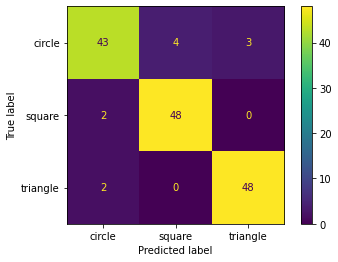

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()